# 1. Importação das Bibliotecas

Utilizamos pandas para manipulação de dados, numpy para operações matemáticas, matplotlib e seaborn para visualização gráfica, e scikit-learn para o modelo KNN.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Carregamento do Dataset
O dataset utilizado contém informações sobre desempenho de estudantes em exames.

In [3]:
import kagglehub

# Baixar o dataset do Kaggle
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)

# Carregar o arquivo CSV
csv_path = path + "/StudentsPerformance.csv"
df = pd.read_csv(csv_path)
df.head()

c:\Users\ediad\OneDrive\Documentos\GitHub\Machine-Learning\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\ediad\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Análise Exploratória dos Dados
Verifique o formato do dataset, os tipos de dados e se há valores nulos.

## 4. Visualização das Notas
Histogramas e boxplots para visualizar a distribuição das notas.

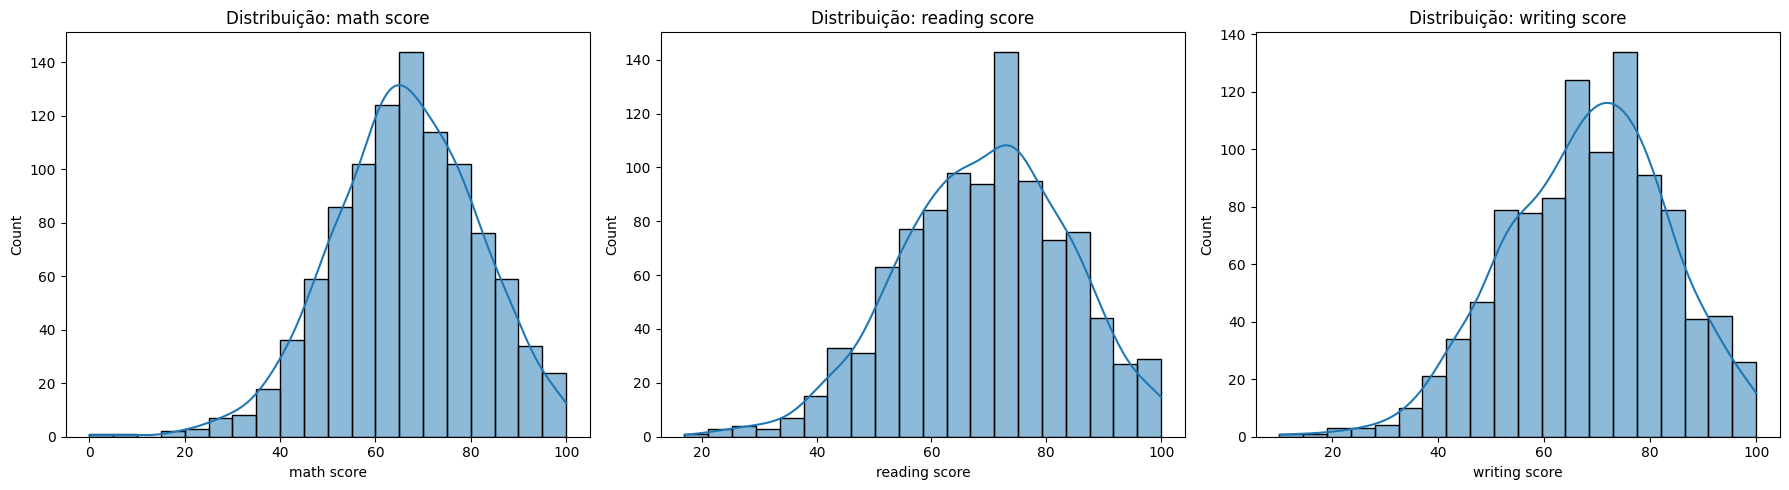

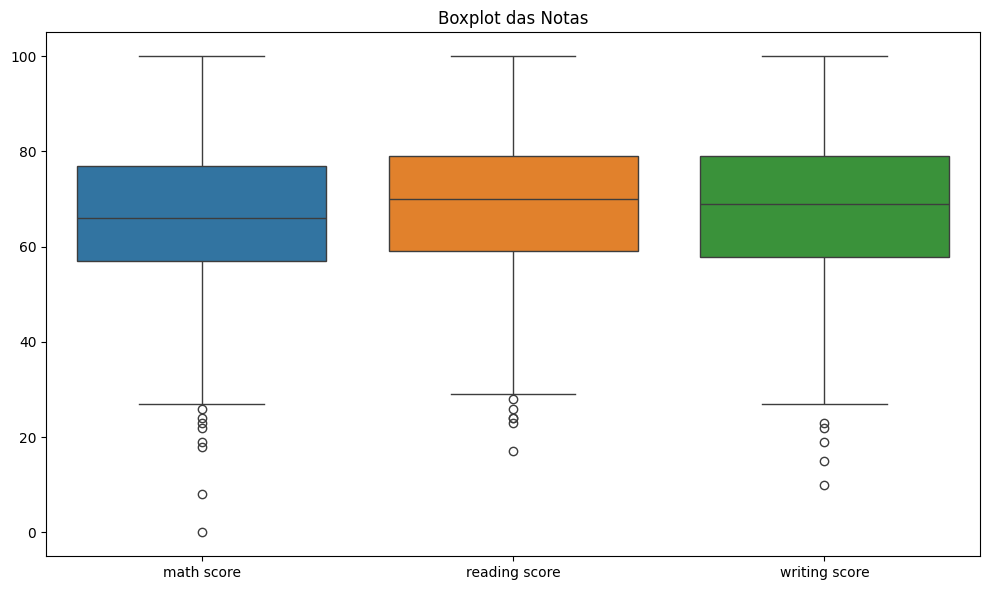

In [19]:
import os
os.makedirs('imagens', exist_ok=True)

# Histogramas das notas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, col in enumerate(['math score', 'reading score', 'writing score']):
    sns.histplot(df[col], bins=20, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribuição: {col}')
plt.tight_layout()
plt.savefig('imagens/histogramas_notas.png')
plt.show()
plt.close(fig)  # Fecha a figura após mostrar

# Boxplot das notas
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']], ax=ax2)
ax2.set_title('Boxplot das Notas')
plt.tight_layout()
plt.savefig('imagens/boxplot_notas.png')
plt.show()
plt.close(fig2)  # Fecha a figura após mostrar

## 5. Estatísticas das Notas e Interpretação
Análise estatística das notas dos estudantes, incluindo média, desvio padrão, valores mínimos e máximos.

In [5]:
print('Formato do dataset:', df.shape)
df.info()
print('\nValores nulos por coluna:')
print(df.isnull().sum())
print('\nEstatísticas das notas:')
print(df[['math score', 'reading score', 'writing score']].describe())

Formato do dataset: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Valores nulos por coluna:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score      

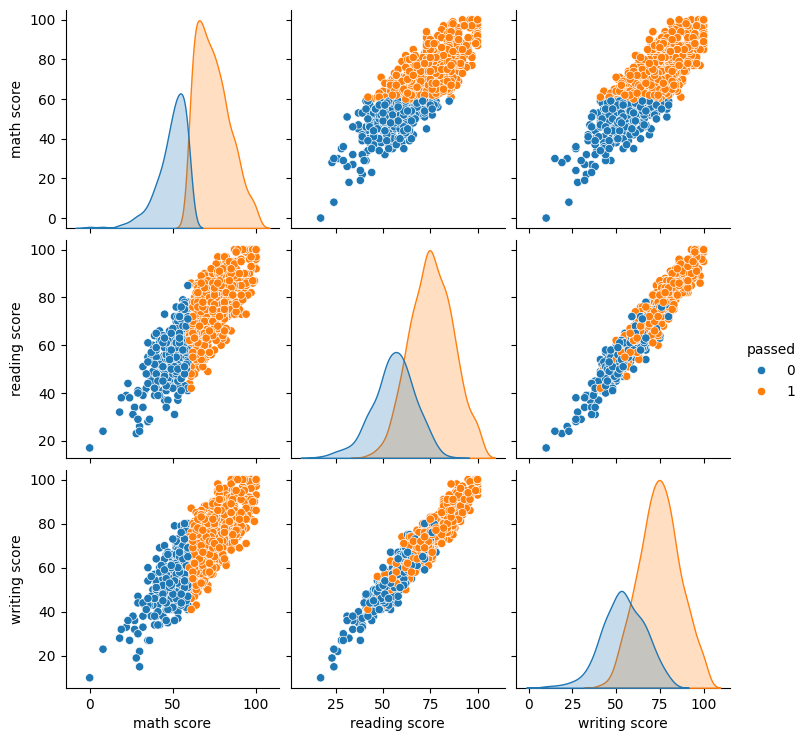

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.makedirs('imagens', exist_ok=True)
# Garante que a coluna 'passed' existe para visualização
if 'passed' not in df.columns:
    df['passed'] = (df['math score'] >= 60).astype(int)
sns.pairplot(df, hue='passed')
plt.savefig('imagens/pairplot_passed.png')
plt.show()

## 7. Pré-processamento dos Dados
Codificação das variáveis categóricas, normalização das notas e criação da coluna alvo para classificação.

## 6. Correlação entre Variáveis
A análise de correlação entre as notas mostra relações entre matemática, leitura e escrita.

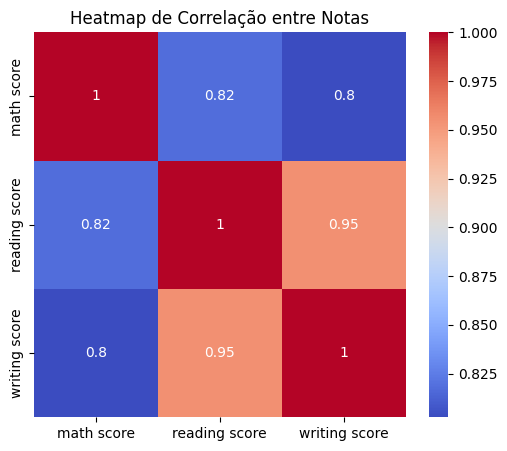

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação entre Notas')
os.makedirs('imagens', exist_ok=True)
plt.savefig('imagens/heatmap_correlacao_notas.png')
plt.show()

In [8]:
# Tratamento de valores ausentes
df = df.dropna()
# Codificação de variáveis categóricas
from sklearn.preprocessing import LabelEncoder
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
# Criar coluna alvo binária para classificação: passed (math score >= 60)
df['passed'] = (df['math score'] >= 60).astype(int)
# Selecionar features (exceto notas) e target
X = df.drop(['math score', 'reading score', 'writing score', 'passed'], axis=1)
y = df['passed']
# Normalização das features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Dados pré-processados (primeiras linhas)
print(df.head())

   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  passed  
0                        1          72             72             74       1  
1                        0          69             90             88       1  
2                        1          90             95             93       1  
3                        1          47             57             44       0  
4                        1          76             78             75       1  


## 8. Divisão dos Dados em Treino e Teste
O conjunto de treino possui 70% dos exemplos e o de teste 30%, garantindo avaliação justa do modelo.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print('Formato treino:', X_train.shape, y_train.shape)
print('Formato teste:', X_test.shape, y_test.shape)

Formato treino: (700, 5) (700,)
Formato teste: (300, 5) (300,)


## 9. Treinamento do Modelo KNN
O modelo KNN é treinado utilizando os dados de treino.

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## 10. Avaliação do Modelo KNN
A avaliação do modelo KNN é feita com os dados de teste, utilizando métricas de acurácia, relatório de classificação e matriz de confusão.

Arquivos knn_y_test.csv e knn_y_pred.csv salvos com sucesso!
Acurácia: 0.62
              precision    recall  f1-score   support

           0       0.44      0.30      0.35       105
           1       0.68      0.79      0.73       195

    accuracy                           0.62       300
   macro avg       0.56      0.55      0.54       300
weighted avg       0.59      0.62      0.60       300



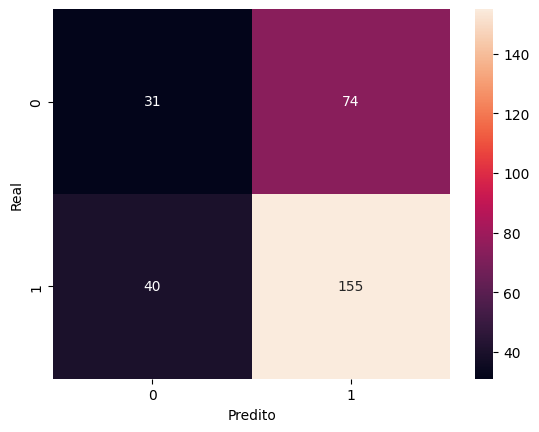

In [16]:
from IPython.display import Image, display
import os
import pandas as pd
y_pred = knn.predict(X_test)
# Salvar resultados para avaliação de métricas em outro notebook
pd.DataFrame(y_test).to_csv('knn_y_test.csv', index=False)
pd.DataFrame(y_pred).to_csv('knn_y_pred.csv', index=False)
print('Arquivos knn_y_test.csv e knn_y_pred.csv salvos com sucesso!')
# Avaliação do modelo KNN
print('Acurácia:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
os.makedirs('imagens', exist_ok=True)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.savefig('imagens/matriz_confusao_knn.png')
plt.show()

## 11. Comparação de Grupos
A comparação de médias por gênero e grupo étnico mostra diferenças entre desempenho em leitura, escrita e matemática.

C:\Users\ediad\AppData\Local\Temp\ipykernel_16632\1519955097.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='math score', data=df, ci=None, ax=ax)


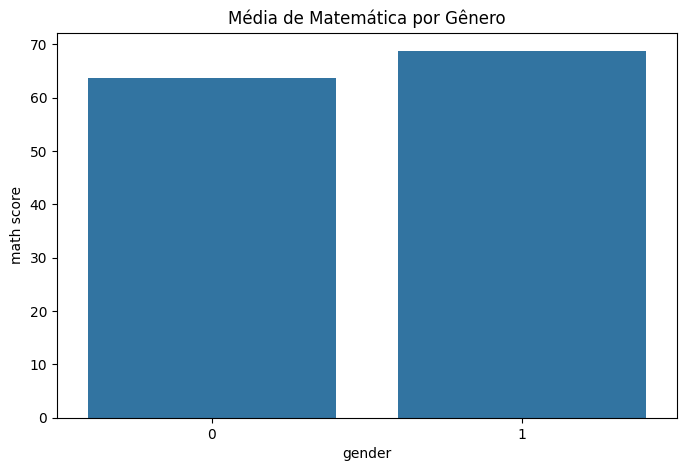

C:\Users\ediad\AppData\Local\Temp\ipykernel_16632\1519955097.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='race/ethnicity', y='math score', data=df, ci=None, ax=ax)


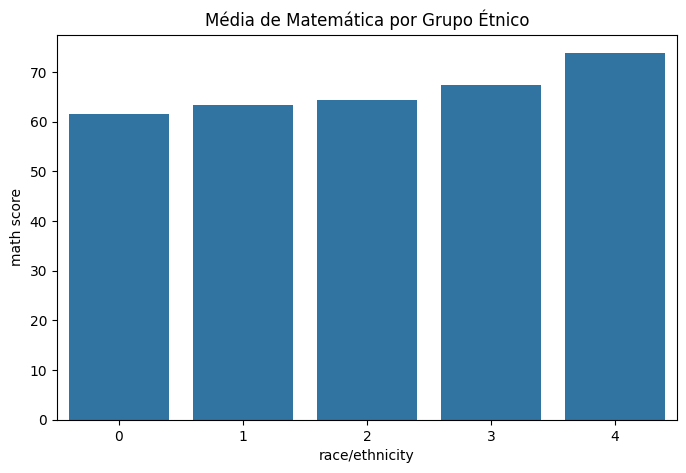

In [21]:
# Comparação por gênero
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('imagens', exist_ok=True)

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='gender', y='math score', data=df, ci=None, ax=ax)
plt.title('Média de Matemática por Gênero')
plt.savefig('imagens/barplot_genero.png')
plt.show()

# Comparação por grupo étnico
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='race/ethnicity', y='math score', data=df, ci=None, ax=ax)
plt.title('Média de Matemática por Grupo Étnico')
plt.savefig('imagens/barplot_etnia.png')
plt.show()

## 12. Visualização da Fronteira de Decisão
Selecionamos as variáveis 'gender' e 'lunch' para facilitar a visualização da fronteira de decisão do modelo KNN.

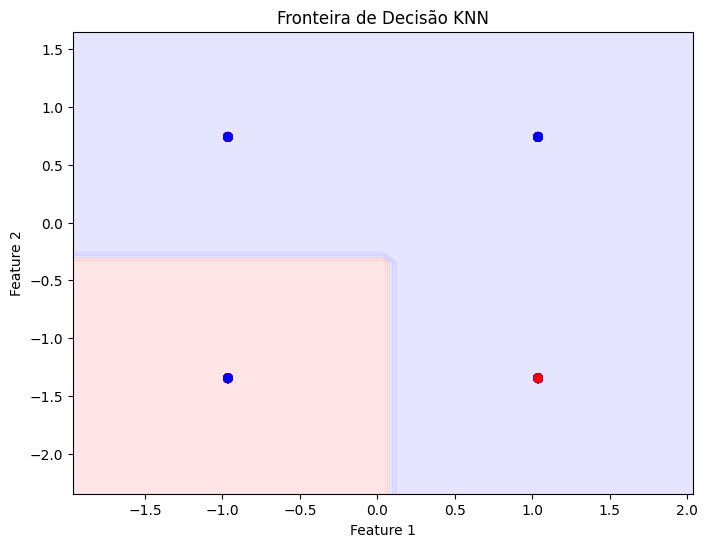

In [13]:
import os

# Selecionar duas features categóricas para visualização
X_vis = df[['gender', 'lunch']].values
y_vis = df['passed']
# Normalizar as features
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)
# Dividir em treino e teste
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y_vis, test_size=0.3, random_state=42)
# Treinar o modelo KNN
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Certifique-se que a função está definida
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#0000FF']
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Fronteira de Decisão KNN')
    os.makedirs('imagens', exist_ok=True)
    plt.savefig('imagens/fronteira_decisao_knn.png')
    plt.show()

# Gerar o gráfico da fronteira de decisão
plot_decision_boundary(X_test_vis, y_test_vis, knn_vis)

**Explicação:**
- Selecionamos as variáveis 'gender' e 'lunch' para facilitar a visualização da fronteira de decisão.
- As variáveis são normalizadas para garantir melhor separação dos dados.
- O modelo KNN é treinado e o gráfico é gerado, mostrando como o algoritmo separa as classes com base nessas duas variáveis.
- O gráfico é salvo automaticamente na pasta de imagens para ser exibido na documentação.